In [259]:
#загрузка библиотек
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#Кластеризация
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

%matplotlib inline

https://digitrain.ru/articles/13812/
    
https://pythonru.com/uroki/sklearn-kmeans-i-knn

https://www.dominodatalab.com/blog/getting-started-with-k-means-clustering-in-python

# Парсинг

In [260]:
df_us = pd.read_csv('data/Data3/train_2.csv', delimiter=';', low_memory=False)
df_us

,ID,MM_IN_BANK,MM_W_CARD,AGE,GENDER,EDUCATION_LEVEL,MARITAL_STATUS,DEPENDANT_CNT,INCOME_MAIN_AMT,REG_CODE
0,500000000000003702,5,5,35,2,3,3,0,87000,9.0
1,500000000000004100,108,0,34,2,3,3,2,180000,31.0
2,500000000000004523,0,0,35,1,1,3,0,61000,38.0
3,500000000000004529,6,6,38,1,5,3,0,318000,42.0
4,500000000000004718,18,5,39,1,-1,3,0,34000,81.0
...,...,...,...,...,...,...,...,...,...,...
199995,500000004694875418,60,5,42,2,3,3,0,60000,62.0
199996,500000004694884558,19,0,37,2,-1,4,1,68000,40.0
199997,500000004694909288,33,3,44,2,1,1,2,58000,26.0
199998,500000004694952000,0,0,31,2,-1,-1,0,NaN,79.0


In [261]:
df_ope = pd.read_csv('data/Data3/train_1.csv', delimiter=';', low_memory=False)
df_ope

,ID,PROD_TYPE,TRANS_DTTM,MCC_CODE,SUM_TRANS,LOCATION_NAME
0,500000001271933224,1,31.10.2021 16:04:58,5411,"411,45",VERNYJ 1263\5A GORKOGO STR\SERPUKHOV\142203 ...
1,500000001089710588,2,20.08.2021 18:00:39,7311,503,AVITO\7 LESNAYA STR\MOSCOW\125196 RUSRUS
2,500000000004725733,1,31.10.2021 7:28:47,5411,"119,24",STOLITSA\14 POBEDY PR-T\KOMSOM-NA-AMU\681029 ...
3,500000000608267511,2,31.10.2021 16:03:14,5411,"249,95",VERNYJ 1361\2 MIRA STR\RAMENSKOE\140105 RUSRUS
4,500000001639102687,1,29.10.2021 13:13:50,5814,290,RESTORAN MGRILLCAFE.\LEVAYA STORONA 423-J KM A...
...,...,...,...,...,...,...
12845070,500000000054762689,2,03.07.2021 8:10:34,5411,1202,NaN
12845071,500000000002290038,1,09.08.2021,5411,955,NaN
12845072,500000000005033472,2,05.10.2021 14:42:52,5311,"1198,1",NaN
12845073,500000000054330593,1,25.09.2021 21:21:02,5411,"435,74",NaN


# Формирование датасетов

In [262]:
df_us['INCOME_MAIN_AMT'] = pd.to_numeric(df_us['INCOME_MAIN_AMT'], errors='coerce').astype('Int64')
df_ope['SUM_TRANS'] = pd.to_numeric(df_ope['SUM_TRANS'], errors='coerce').astype('Int64')

<AxesSubplot:>

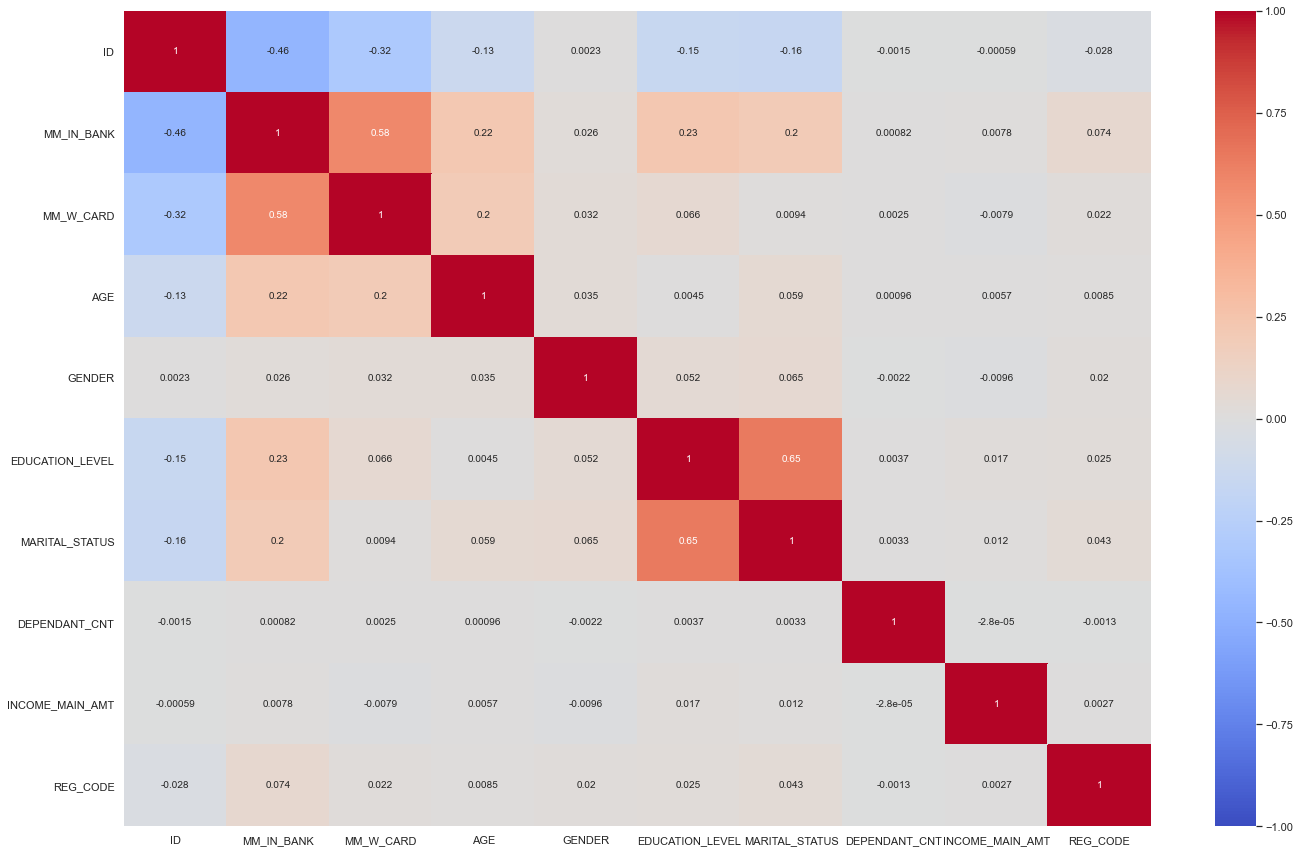

In [263]:
plt.figure(figsize=(23, 15))
sns.heatmap(df_us.corr(), annot = True, vmin=-1, vmax=1,cmap= 'coolwarm')

На корреляционной карте выше видно, что довольно сильно коррелируют между собой атрибуты:



In [264]:
df = df_us[['ID', 'AGE', 'GENDER', 'MM_W_CARD', 'MM_IN_BANK', 'EDUCATION_LEVEL', 'MARITAL_STATUS', 'INCOME_MAIN_AMT', 'REG_CODE']].head(1000)
df

,ID,AGE,GENDER,MM_W_CARD,MM_IN_BANK,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE
0,500000000000003702,35,2,5,5,3,3,87000,9.0
1,500000000000004100,34,2,0,108,3,3,180000,31.0
2,500000000000004523,35,1,0,0,1,3,61000,38.0
3,500000000000004529,38,1,6,6,5,3,318000,42.0
4,500000000000004718,39,1,5,18,-1,3,34000,81.0
...,...,...,...,...,...,...,...,...,...
995,500000000000300372,31,1,10,10,3,1,50000,35.0
996,500000000000300530,47,2,45,45,-1,-1,<NA>,32.0
997,500000000000300912,57,2,13,13,4,4,40000,33.0
998,500000000000301058,40,1,5,5,5,3,189000,25.0


# Обработка данных

In [277]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


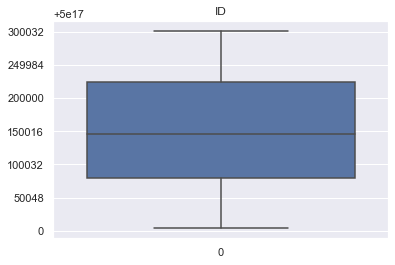

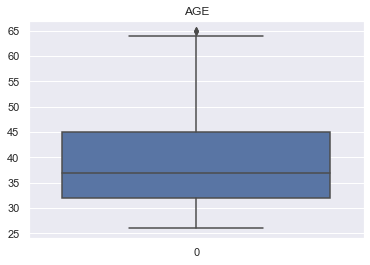

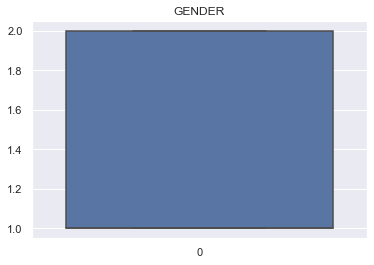

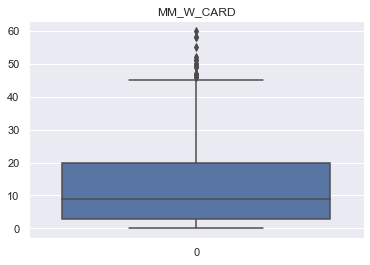

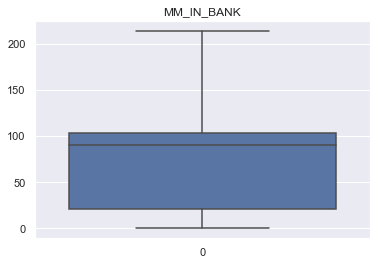

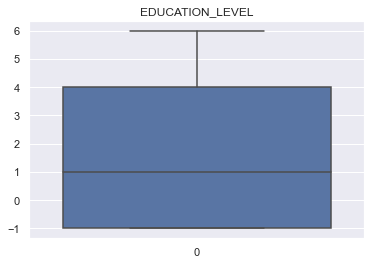

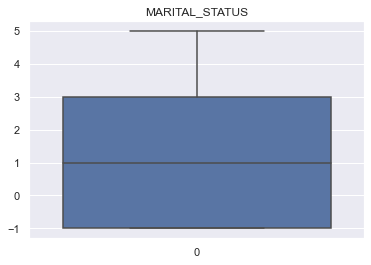

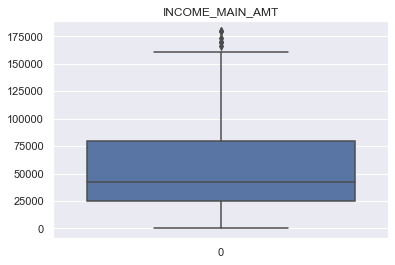

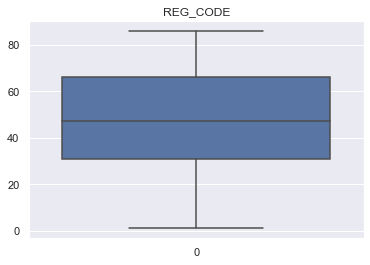

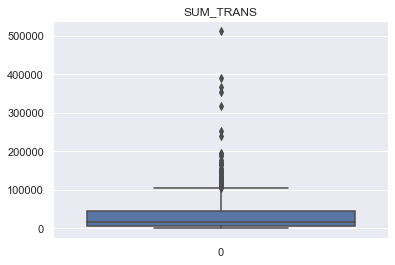

In [278]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    sns.boxplot(data=df[col])
    plt.show()

In [279]:
#Очистка выбросов
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]  

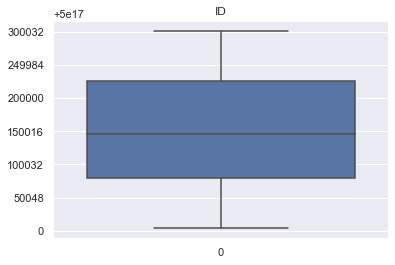

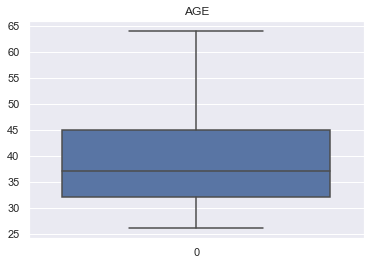

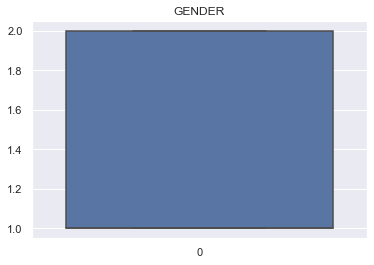

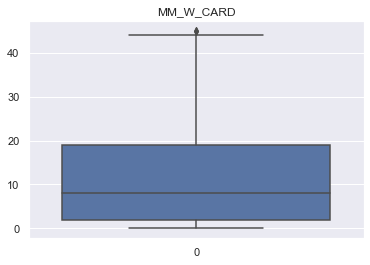

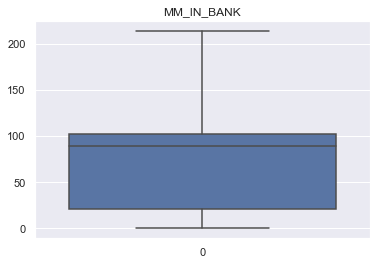

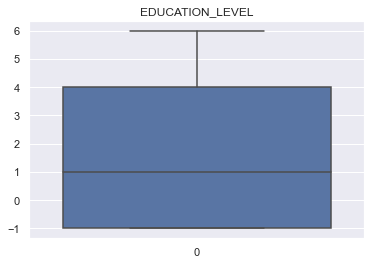

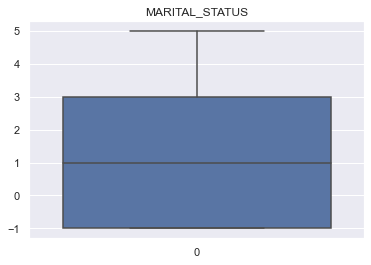

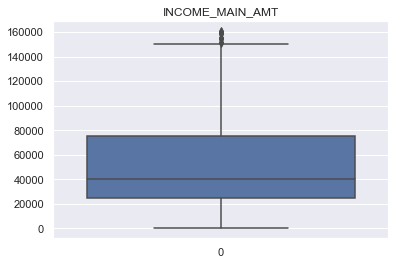

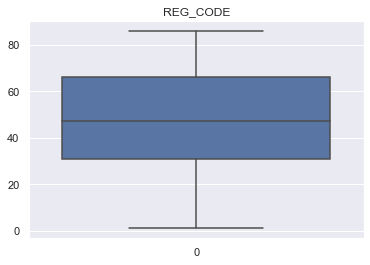

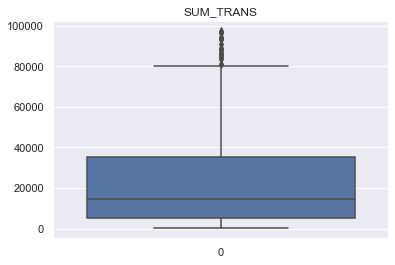

In [280]:
#Вывод коробчатых диаграм в цикле только по числовым атриубтам
for col in df.select_dtypes(exclude=["object", "datetime64[ns]"]).columns:
    #построение фигуры
    plt.figure()
    #Заголовк
    plt.title(col)
    #Вывод диаграммы
    sns.boxplot(data=df[col])
    plt.show()

# Доп атр

In [281]:
df["SUM_TRANS"] = df["ID"].map(df_ope.groupby("ID")["SUM_TRANS"].sum())

In [282]:
df

,ID,AGE,GENDER,MM_W_CARD,MM_IN_BANK,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,SUM_TRANS
0,500000000000003702,35,2,5,5,3,3,87000,9.0,50266
2,500000000000004523,35,1,0,0,1,3,61000,38.0,46196
3,500000000000004718,39,1,5,18,-1,3,34000,81.0,7063
4,500000000000004919,40,1,20,20,1,4,69000,81.0,35101
5,500000000000004979,35,2,3,20,-1,1,25000,62.0,1486
...,...,...,...,...,...,...,...,...,...,...
674,500000000000297186,30,2,6,27,3,1,40000,28.0,1563
675,500000000000298896,29,2,24,92,2,1,37500,42.0,768
677,500000000000300372,31,1,10,10,3,1,50000,35.0,39992
678,500000000000300912,57,2,13,13,4,4,40000,33.0,14427


# Кластеризация

Переменная для атрибутов и прочее

In [283]:
#Помещу их в переменную X
X = df[["AGE", "SUM_TRANS", "REG_CODE"]]

In [284]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [285]:
#Обьявляю метод главных компонент
pca = PCA(n_components=2)
#Применяю его на данных
X = pca.fit_transform(X)

## KMeans

Определение количества кластров методом локтя. Метод локтя строит график суммы квадратов внутри кластера (WCSS) в зависимости от количества кластеров. 

In [286]:
#Нам нужно определить цикл for, который содержит экземпляры класса KMeans. Этот цикл for будет перебирать номера кластеров с первого по 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)

C:\Users\allmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [287]:
#Затем мы добавляем значения WCSS в наш список. Мы получаем доступ к этим значениям через атрибут инерции объекта KMeans:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\allmi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


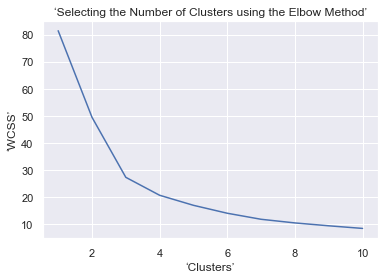

In [288]:
#Наконец, мы можем построить график зависимости WCSS от количества кластеров. Во-первых, давайте импортируем Matplotlib and Seaborn, который позволит нам создавать и форматировать визуализации данных:
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('‘Selecting the Number of Clusters using the Elbow Method’')
plt.xlabel('‘Clusters’')
plt.ylabel('‘WCSS’')
plt.show()

Из этого графика мы видим, что четыре - оптимальное количество кластеров, поскольку именно здесь появляется «изгиб» кривой.

In [289]:
#Настройка параметров
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
#Предсказание
kmpreds = kmeans.predict(X)
#Заношу кластеризированные метки в набор данных
df["KMCLUSTS"] = kmpreds


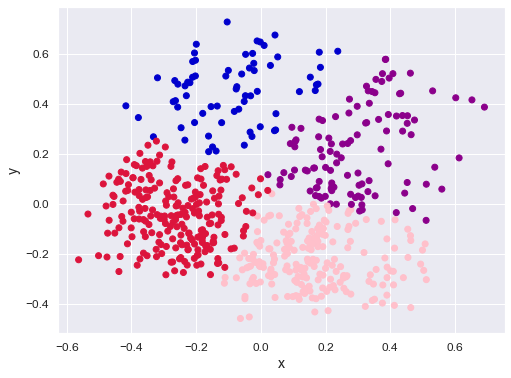

In [290]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta", "pink"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=df["KMCLUSTS"], 
 cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [291]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["KMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["KMCLUSTS"]))

590.8417967633108
0.7793095248094941


## MiniBatchKMeans

In [292]:
#Настройка параметров
kbmeans = MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=4096)
#Заношу кластеризированные метки в набор данных
df["KBCLUSTS"] = kbmeans.fit_predict(X)

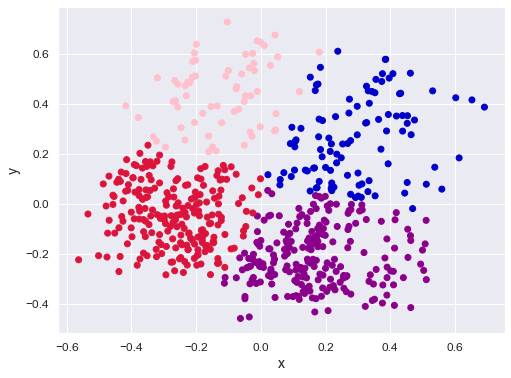

In [293]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta", "pink"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=df["KBCLUSTS"], 
 cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [294]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["KBCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["KBCLUSTS"]))

590.509774012741
0.7668447842420376


## GaussianMixtures

In [295]:
#Настройка параметров
gm = GaussianMixture(n_components=2, random_state=0).fit_predict(X)
#Заношу кластеризированные метки в набор данных
df["GMCLUSTS"] = gm

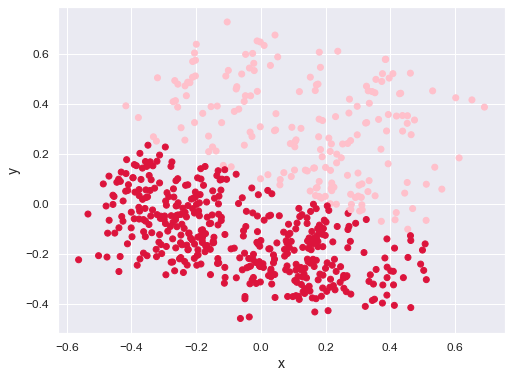

In [296]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta", "pink"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=df["GMCLUSTS"], 
 cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [297]:
#Использую метрику calinski_harabasz_score
print(sklearn.metrics.calinski_harabasz_score(X, df["GMCLUSTS"]))
#Использую метрику davies_bouldin_score
print(sklearn.metrics.davies_bouldin_score(X, df["GMCLUSTS"]))

334.38426436871964
1.1501038997369004


Итог

Решение

По результатам метрик и визуализаций, лучшим алгоритмом является GussianMixture

In [298]:
# Удаление ненужных атрибутов с кластерами
df.drop(columns=['KMCLUSTS', 'KBCLUSTS'], axis=1, inplace=True)

Сохранение

In [299]:
#df.to_csv('output.csv', index=False, encoding='utf-8-sig')

# Счеты

# lan

In [300]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Алгоритмы классификации
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Игнорирование ошибок будущих версий
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Разведочный анализ

In [301]:
# df = pd.read_csv('output.csv')

In [302]:
df

,ID,AGE,GENDER,MM_W_CARD,MM_IN_BANK,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,SUM_TRANS,GMCLUSTS
0,500000000000003702,35,2,5,5,3,3,87000,9.0,50266,0
2,500000000000004523,35,1,0,0,1,3,61000,38.0,46196,0
3,500000000000004718,39,1,5,18,-1,3,34000,81.0,7063,0
4,500000000000004919,40,1,20,20,1,4,69000,81.0,35101,0
5,500000000000004979,35,2,3,20,-1,1,25000,62.0,1486,0
...,...,...,...,...,...,...,...,...,...,...,...
674,500000000000297186,30,2,6,27,3,1,40000,28.0,1563,0
675,500000000000298896,29,2,24,92,2,1,37500,42.0,768,0
677,500000000000300372,31,1,10,10,3,1,50000,35.0,39992,0
678,500000000000300912,57,2,13,13,4,4,40000,33.0,14427,1


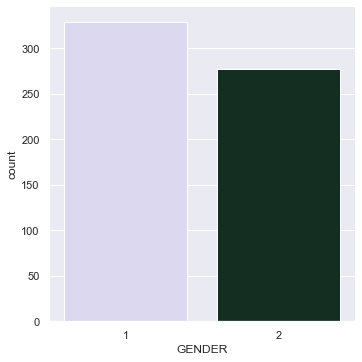

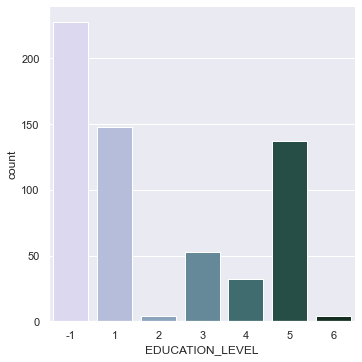

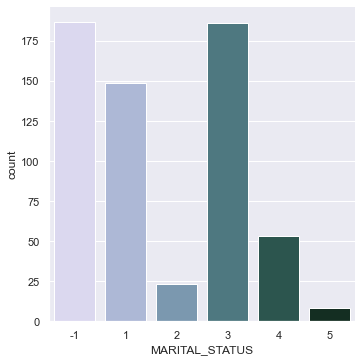

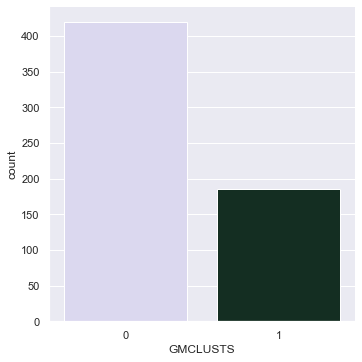

In [303]:
skip = ['AGE', 'INCOME_MAIN_AMT', 'ID', 'MM_W_CARD', 'MM_IN_BANK', 'SUM_TRANS']
#Категориальные признаки
for i in df0.columns:
    if i not in skip and i != 'REG_CODE':
        sns.catplot(x=i, kind='count', palette='ch:20', data=df)
        plt.show()

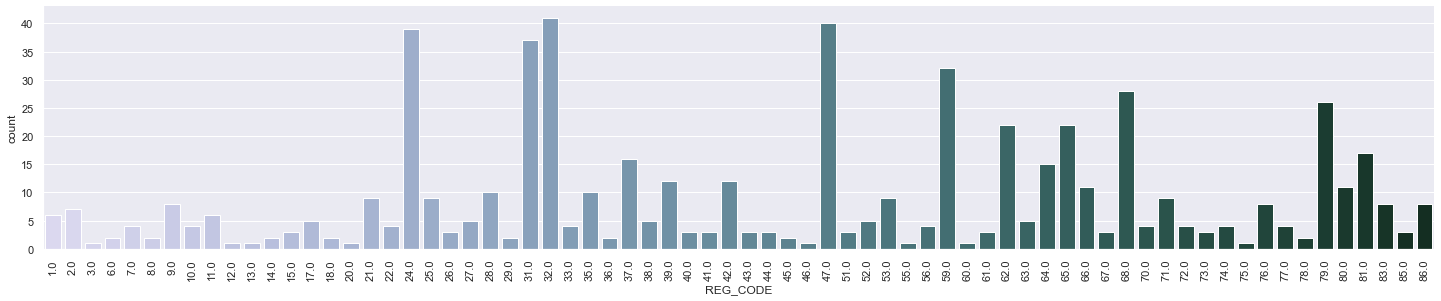

In [304]:
sns.catplot(x='REG_CODE', kind='count', palette='ch:20', height=4, aspect=5, data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='REG_CODE'>

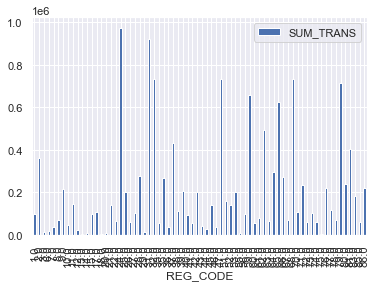

In [305]:
newdf = df[['REG_CODE','SUM_TRANS']].groupby('REG_CODE').sum()
newdf.plot(kind='bar')

<AxesSubplot:xlabel='GENDER'>

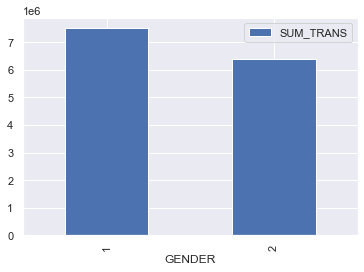

In [306]:
newdf = df[['GENDER','SUM_TRANS']].groupby('GENDER').sum()
newdf.plot(kind='bar')

# Разб

In [309]:
df.head()

,ID,AGE,GENDER,MM_W_CARD,MM_IN_BANK,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,SUM_TRANS,GMCLUSTS
0,500000000000003702,35,2,5,5,3,3,87000,9.0,50266,0
2,500000000000004523,35,1,0,0,1,3,61000,38.0,46196,0
3,500000000000004718,39,1,5,18,-1,3,34000,81.0,7063,0
4,500000000000004919,40,1,20,20,1,4,69000,81.0,35101,0
5,500000000000004979,35,2,3,20,-1,1,25000,62.0,1486,0


Система рекомендаций будет определять категорию принадлежности, то есть порекомендовать пользователю товар для мужчин или для женщин

In [310]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [311]:
#Помещу их в переменную X
X = df[["AGE", "EDUCATION_LEVEL", "REG_CODE", "GMCLUSTS"]]
y = df["GENDER"]

In [312]:
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Реализация моделей

KNN

In [313]:
#Объявление классификатор
neigh = KNeighborsClassifier()
#Обучение классификатора
neigh.fit(X_train, y_train)

KNeighborsClassifier()

GaussianNB

In [314]:
#Объявление классификатор
gnb = GaussianNB()
#Обучение классификатора
gnb.fit(X_train, y_train)
GaussianNB()

GaussianNB()

LogisticRegression

In [315]:
#Объявление классификатор
clf = LogisticRegression()
#Обучение классификатора
clf.fit(X_train, y_train)

LogisticRegression()

Метрики
Теперь посмотрю на результаты метрик, я буду рассматривать метрики - f1 и accuracy sore, f так же f1 по macro avg

KNN

In [317]:

#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neigh.predict(X_test)))

              precision    recall  f1-score   support

           1       0.57      0.60      0.58        99
           2       0.49      0.47      0.48        83

    accuracy                           0.54       182
   macro avg       0.53      0.53      0.53       182
weighted avg       0.54      0.54      0.54       182



GaussianNB

In [318]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, gnb.predict(X_test)))

              precision    recall  f1-score   support

           1       0.57      0.72      0.63        99
           2       0.51      0.35      0.41        83

    accuracy                           0.55       182
   macro avg       0.54      0.53      0.52       182
weighted avg       0.54      0.55      0.53       182



LogisticRegression

In [319]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.57      0.74      0.64        99
           2       0.51      0.33      0.40        83

    accuracy                           0.55       182
   macro avg       0.54      0.53      0.52       182
weighted avg       0.54      0.55      0.53       182



Решение
По итогам метрик, остановлюсь на алгоритме KNN, так как он имеет самые высокие показатели, по f1 accuracy показал 0.99, и f1 macro avg 0.99. В то время как остальные алгоритмы показали 1, что может оказаться переобучением.

Оптимизация модели

In [320]:
df.head()

,ID,AGE,GENDER,MM_W_CARD,MM_IN_BANK,EDUCATION_LEVEL,MARITAL_STATUS,INCOME_MAIN_AMT,REG_CODE,SUM_TRANS,GMCLUSTS
0,500000000000003702,35,2,5,5,3,3,87000,9.0,50266,0
2,500000000000004523,35,1,0,0,1,3,61000,38.0,46196,0
3,500000000000004718,39,1,5,18,-1,3,34000,81.0,7063,0
4,500000000000004919,40,1,20,20,1,4,69000,81.0,35101,0
5,500000000000004979,35,2,3,20,-1,1,25000,62.0,1486,0


In [321]:
#обьявляю MinMaxScaler
scaler = MinMaxScaler()
#преобразую данные
X = scaler.fit_transform(X)

In [322]:
#Помещу их в переменную X
X = df[["AGE", "EDUCATION_LEVEL", "REG_CODE", "GMCLUSTS", 'INCOME_MAIN_AMT']]
y = df["GENDER"]

In [323]:
#Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Реализация моделей

In [324]:
#Объявление классификатор
neigh2 = KNeighborsClassifier(n_neighbors=2, leaf_size=10, p=3, n_jobs=-1)
#Обучение классификатора
neigh2.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_jobs=-1, n_neighbors=2, p=3)

Метрика

In [325]:
#Вывожу результаты метрик при помощи classification_report
print(classification_report(y_test, neigh2.predict(X_test)))

              precision    recall  f1-score   support

           1       0.55      0.72      0.62        99
           2       0.46      0.29      0.36        83

    accuracy                           0.52       182
   macro avg       0.50      0.50      0.49       182
weighted avg       0.51      0.52      0.50       182



Модель стала хуже, так что для дальнейшего использования лучше будет оставить первую версию

Сохранение лучшей модели

In [326]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(neigh, open(filename, 'wb'))

загрузка модели

In [327]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))

In [328]:
# df.to_csv('output2.csv', index=False, encoding='utf-8-sig')